References:

* https://young.physics.ucsc.edu/115/leapfrog.pdf
* https://www.physics.udel.edu/~bnikolic/teaching/phys660/numerical_ode/node5.html

In [80]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from numba import jit

In [159]:
G = 4*np.pi**2 # Newton's constant
M = 1.  # total mass in sun masses
T = 1.0 # in years
n = 2000 # number of divisions

In [212]:
def F(x: np.array) -> np.array:
    """
    Acceleration
    """
    
    return - (G * M / norm(x)**3) * x

In [213]:
def energy(x, v):
    return - G*M/norm(x) + .5 * norm(v)**2

In [214]:
x0 = np.array([0.5, 0.3])
v0 = np.array([0, 2*np.pi])

In [215]:
x_list = [x0]
v_list = [v0]
E_list = [energy(x0, v0)]
dt = T/n

x = x0
v = v0

for _ in range(n):
    u = v + .5 * dt * F(x)
    x = x + dt * u
    v = u + .5 * dt * F(x)
    
    E = energy(x, v)
    
    x_list.append(x)
    v_list.append(v)
    E_list.append(E)

# to array
t = np.linspace(0,T,n+1)
x_ar = np.array(x_list)
v_ar = np.array(v_list)
E_ar = np.array(E_list)

É fácil de mostrar que isso conserva momento angular perfeitamente

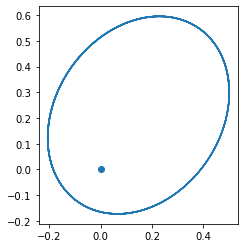

In [216]:
plt.plot(x_ar[:,0], x_ar[:,1])
plt.scatter(0,0)
plt.axis('scaled')
plt.show()

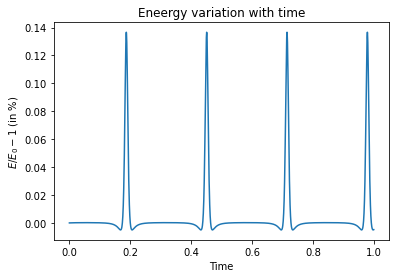

In [217]:
plt.plot(t, 100*(E_ar/E_ar[0]-1))
plt.xlabel("Time")
plt.ylabel("$E/E_0 - 1$ (in %)")
plt.title("Eneergy variation with time")
plt.show()

# Beeman algorithm

In [218]:
x0 = np.array([0.5, 0.3])
v0 = np.array([0, 2*np.pi])

In [219]:
x_list = [x0]
v_list = [v0]
E_list = [energy(x0, v0)]
dt = T/n

x = x0
v = v0

a_0 = 0
a_1 = 0
a_2 = 0
for i in range(n):
    
    # first step needs to be done via another method; choose Euler-Cromer
    if i < 1:
        a_0 = F(x)
        x = x + dt * v
        
        a_1 = F(x)
        v = v + dt * a_1
        
    else:

        x = x + v * dt + (4*a_1 - a_0) * dt**2 /6

        a_2 = F(x)
        
        v = v + (2*a_2 + 5*a_1 - a_0) * dt/6
        
        a_0 = a_1
        a_1 = a_2
        
        
    E = energy(x, v)
    
    x_list.append(x)
    v_list.append(v)
    E_list.append(E)

# to array
t = np.linspace(0,T,n+1)
x_ar = np.array(x_list)
v_ar = np.array(v_list)
E_ar = np.array(E_list)

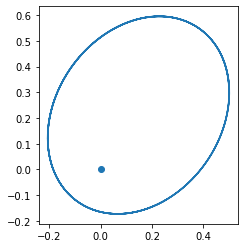

In [220]:
plt.plot(x_ar[:,0], x_ar[:,1])
plt.scatter(0,0)
plt.axis('scaled')
plt.show()

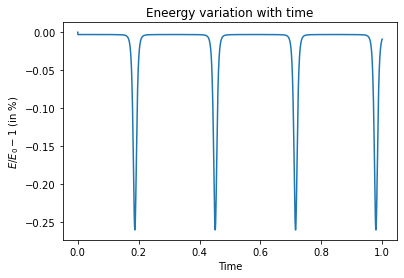

In [221]:
plt.plot(t, 100*(E_ar/E_ar[0]-1))
plt.xlabel("Time")
plt.ylabel("$E/E_0 - 1$ (in %)")
plt.title("Eneergy variation with time")
plt.show()

Both methods are pretty efficient at maintaining energy conservation

## 2 bodies